In [1]:
pip install ipympl

Note: you may need to restart the kernel to use updated packages.


In [2]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import matplotlib as mpl
import matplotlib.animation as animation
from tqdm import tqdm

In [3]:

Nt = 400
Nx = 20
Ny = 20

x = np.linspace(0,2,Nx)
y = np.linspace(0,2,Nx)
t = np.linspace(0,3,Nt)

deltax = x[1] - x[0]
deltay = y[1] - y[0]
deltat = t[1] - t[0]

v = np.sqrt(2)

lambda_ = v*deltat/deltax
mu_ = 5*deltat/deltay

print(lambda_,mu_)

0.10101525445522108 0.35714285714285715


In [4]:
def ui(x,y):
    
    return np.sin(np.pi*x)*np.sin(np.pi*y)

In [5]:
u = np.zeros((Nt,Nx,Ny))
for i in range(len(x)):
    for j in range(len(y)):
        u[0,i,j] = ui(x[i],y[j])

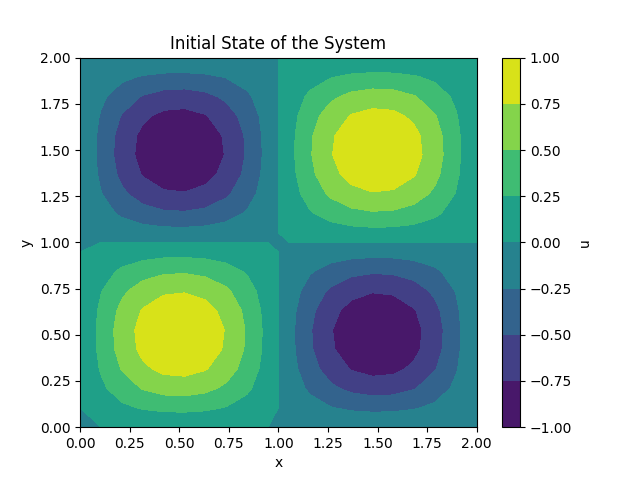

In [6]:
X, Y = np.meshgrid(x, y)
plt.contourf(X, Y, u[0], cmap='viridis')
plt.colorbar(label='u')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Initial State of the System')
plt.show()

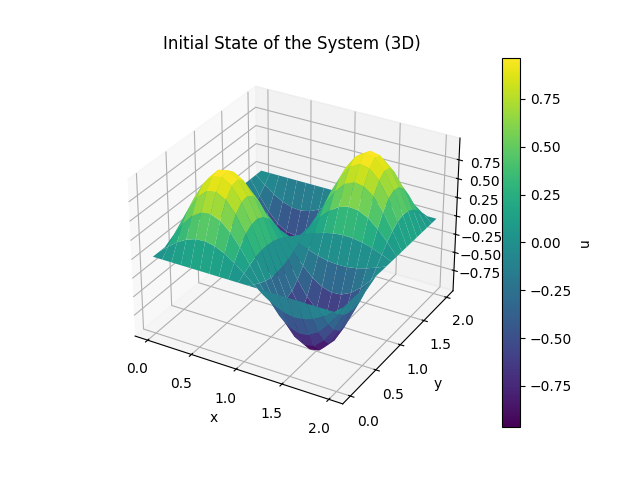

In [7]:
X, Y = np.meshgrid(x, y)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, u[0], cmap='viridis')
fig.colorbar(surf, ax=ax, label='u')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u')
ax.set_title('Initial State of the System (3D)')
plt.show()

In [8]:
def GetSolution():
    
    gamma = 3*deltat
    
    for l in tqdm(range(1,len(t))):
        
        if l == 1:
            u[l,:,:] = u[l-1,:,:]
        else:
        
            for i in range(1,len(x)-1):
                for j in range(1,len(y)-1):
                    u[l,i,j] = 2*(1-lambda_**2-mu_**2)*u[l-1,i,j] \
                    + lambda_**2*( u[l-1,i+1,j] + u[l-1,i-1,j] ) \
                    + mu_**2*( u[l-1,i,j+1] + u[l-1,i,j-1] ) \
                    - u[l-2,i,j] \
                    - gamma*u[l-1,i,j] + gamma*u[l-2,i,j]

In [9]:

GetSolution()

100%|██████████| 399/399 [00:00<00:00, 976.75it/s]


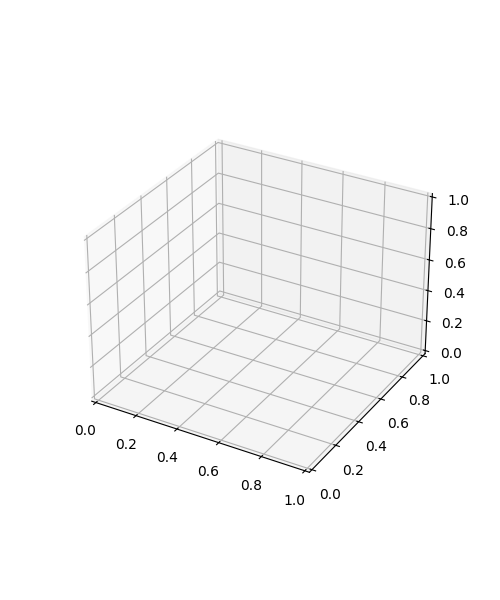

In [10]:
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(111, projection='3d')

X,Y = np.meshgrid(x,y)

def init():
    
    
    ax.set_xlim3d(0,2)
    ax.set_ylim3d(0,2)
    ax.set_zlim3d(-2,2)

def Update(i):

    ax.clear()
    init()
    
    ax.plot_surface(X,Y,u[i,:,:],cmap='viridis')
    
Animation = animation.FuncAnimation(fig,Update,frames=len(t),init_func=init)

In [12]:
f = "C:\\Users\\se.sanchezr1\\Desktop\\adios.gif"
writergif = animation.PillowWriter(fps=30)
Animation.save(f, writer=writergif)